# Heart Disease Risk Assessment

### Project Overview
The objective of this project is to develop a model to predict the risk of heart disease using a dataset containing various health and demographic information. The steps include data preprocessing, exploratory data analysis, model training, and evaluation, followed by deployment as a web application using Streamlit.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

- Patient ID - Unique identifier for each patient
- Age - Age of the patient
- Sex - Gender of the patient (Male/Female)
- Cholesterol - Cholesterol levels of the patient
- Blood Pressure - Blood pressure of the patient (systolic/diastolic)
- Heart Rate - Heart rate of the patient
- Diabetes - Whether the patient has diabetes (Yes/No)
- Family History - Family history of heart-related problems (1: Yes, 0: No)
- Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
- Exercise Hours Per Week - Number of exercise hours per week
- Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use - Medication usage by the patient (1: Yes, 0: No)
- Stress Level - Stress level reported by the patient (1-10)
- Sedentary Hours Per Day - Hours of sedentary activity per day
- Income - Income level of the patient
- BMI - Body Mass Index (BMI) of the patient
- Triglycerides - Triglyceride levels of the patient
- Physical Activity Days Per Week - Days of physical activity per week
- Sleep Hours Per Day - Hours of sleep per day
- Country - Country of the patient
- Continent - Continent where the patient resides
- Hemisphere - Hemisphere where the patient resides
- Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

Loading the Dataset

In [2]:
# Load the dataset
heart_df = pd.read_csv("O:/virtual_intern/CodeClause-Data Science/Heart Disease Risk Assessment/heart_attack_prediction_dataset.csv")
pd.set_option("display.max_column",None)
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Data Preprocessing

In [3]:
heart_df['Systolic BP']=heart_df['Blood Pressure'].apply(lambda x: float(x.split('/')[0]))
heart_df['Diastolic BP']=heart_df['Blood Pressure'].apply(lambda x: float(x.split('/')[1]))
# Drop the original 'Blood Pressure' column
heart_df.drop('Blood Pressure', axis=1, inplace=True)
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158.0,88.0
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165.0,93.0
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174.0,99.0
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163.0,100.0
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91.0,88.0


In [4]:
heart_df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'Systolic BP', 'Diastolic BP'],
      dtype='object')

Basic Information about the Data

In [5]:
# Display basic information about the dataframe
heart_df.shape

(8763, 27)

In [6]:
heart_df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic BP                        0
Diastolic BP                       0
d

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [8]:
heart_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


### Exploratory Data Analysis (EDA)
Visualizing the Target Variable

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


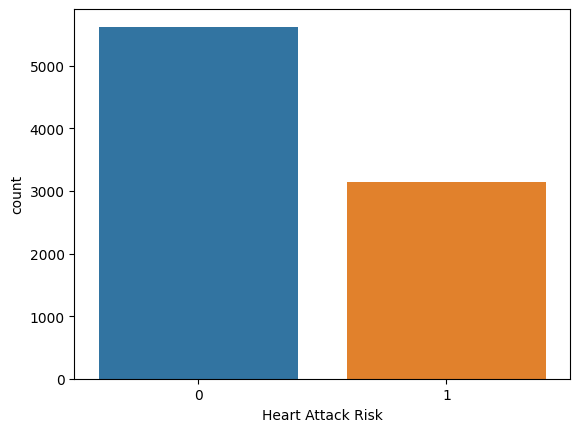

In [9]:
# Visualize the target variable
print(heart_df["Heart Attack Risk"].value_counts())
sns.countplot(x="Heart Attack Risk", data=heart_df)
plt.show()

Visualizing Gender Distribution

Sex
Male      6111
Female    2652
Name: count, dtype: int64


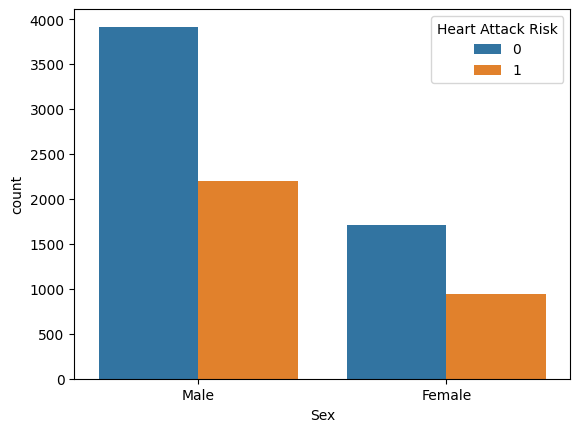

In [10]:
print(heart_df["Sex"].value_counts())
sns.countplot(x="Sex", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Diet Distribution

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64


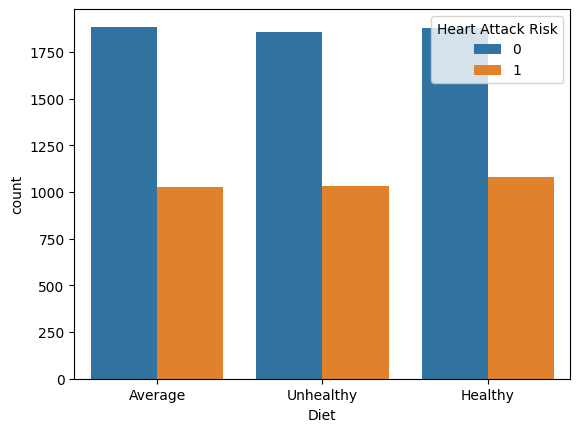

In [11]:
print(heart_df["Diet"].value_counts())
sns.countplot(x="Diet", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Family History

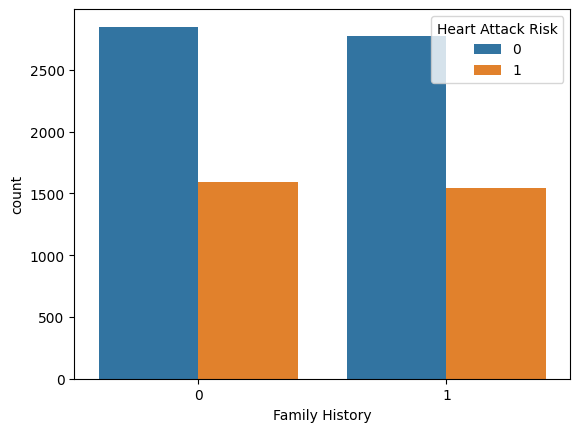

In [12]:
sns.countplot(x="Family History", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Continent Distribution

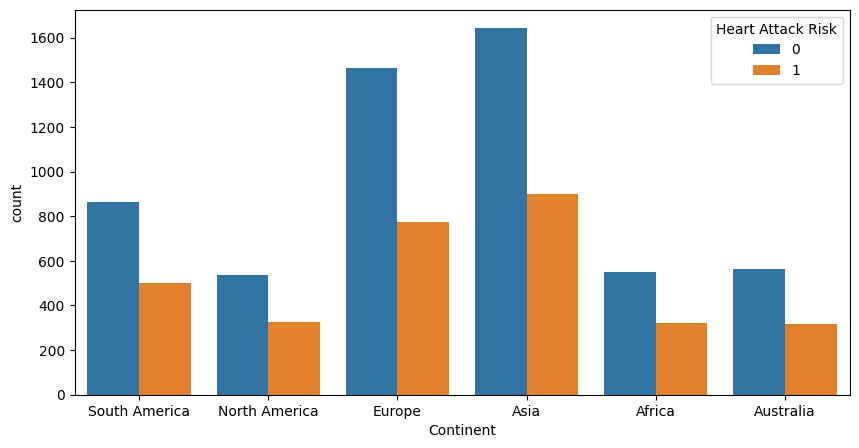

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x="Continent", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Country Distribution

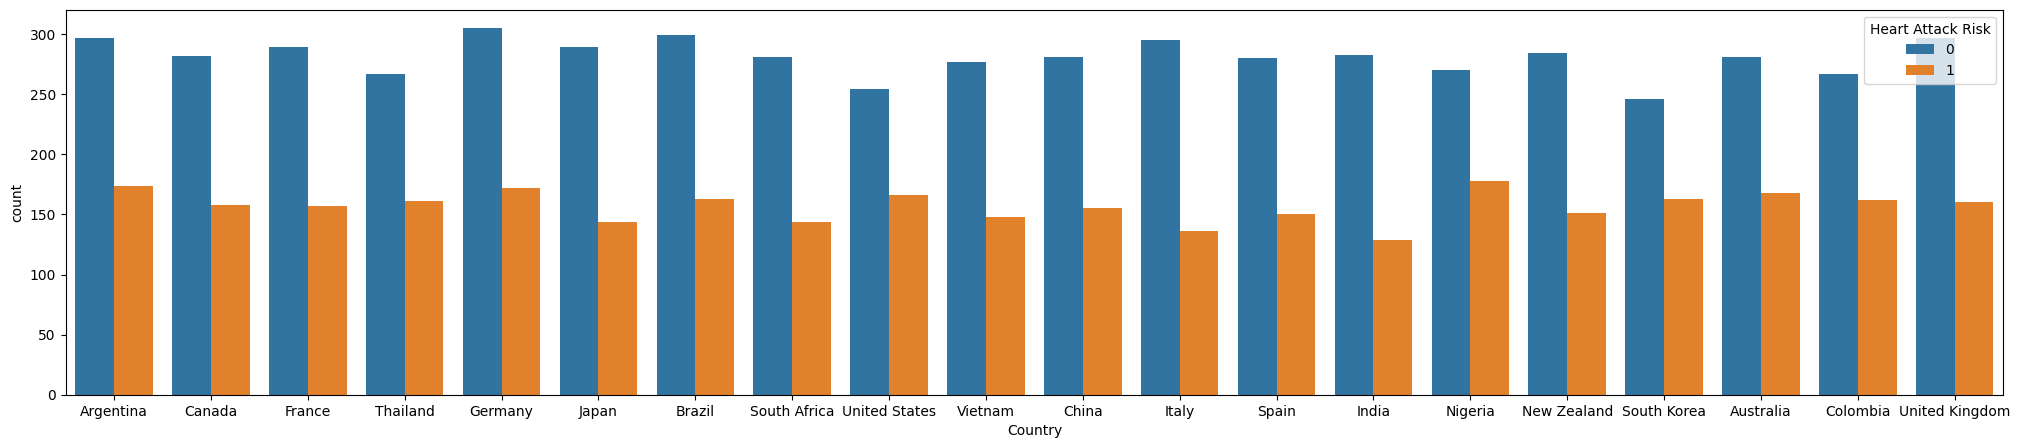

In [14]:
plt.figure(figsize=(25,5))
sns.countplot(x="Country", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Smoking Distribution

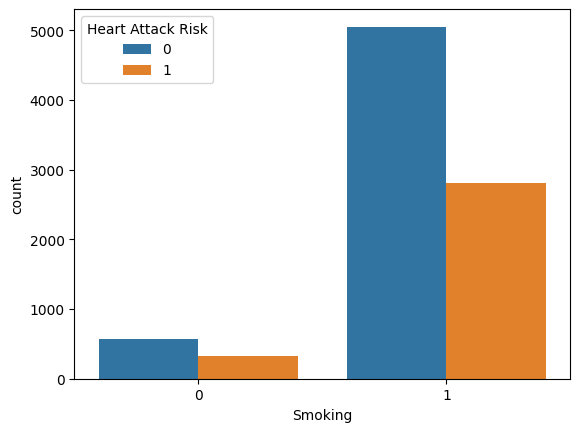

In [15]:
sns.countplot(x="Smoking", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Alcohol Consumption Distribution

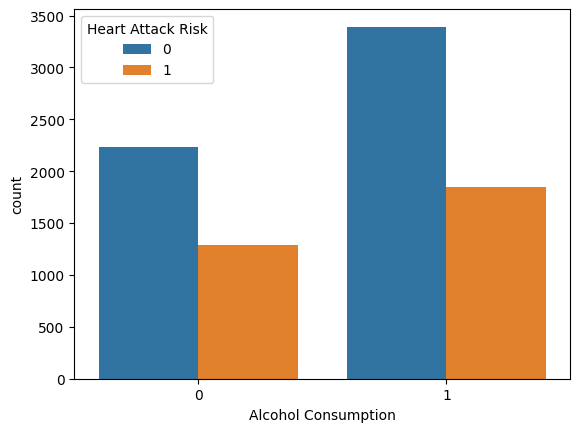

In [16]:
sns.countplot(x="Alcohol Consumption", data=heart_df,hue='Heart Attack Risk')
plt.show()

Visualizing Age and Cholesterol Distributions

C:\Users\DEBANGA\AppData\Local\Temp\ipykernel_15900\1718450342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df['Age'],hist=False)


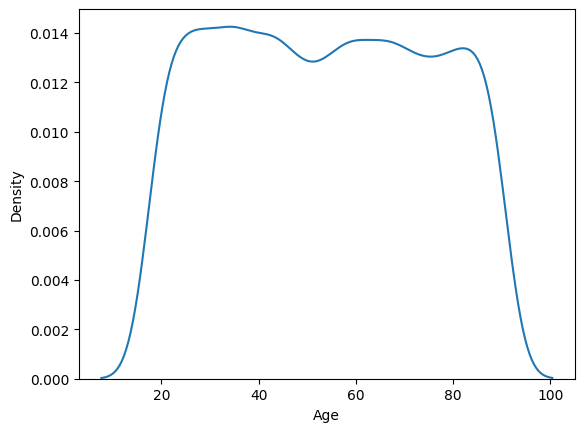

In [17]:
sns.distplot(heart_df['Age'],hist=False)
plt.show()

C:\Users\DEBANGA\AppData\Local\Temp\ipykernel_15900\788258379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df['Cholesterol'],hist=False)


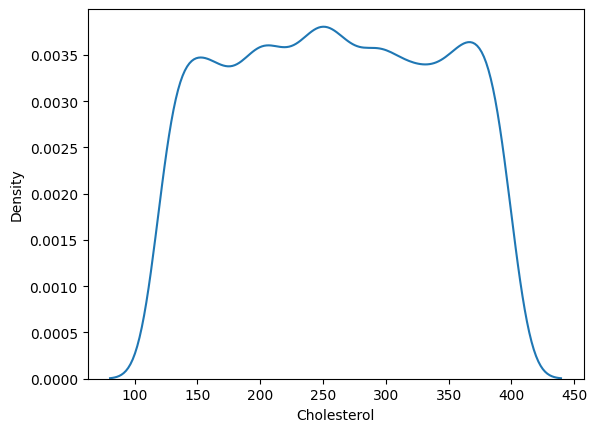

In [18]:
sns.distplot(heart_df['Cholesterol'],hist=False)
plt.show()

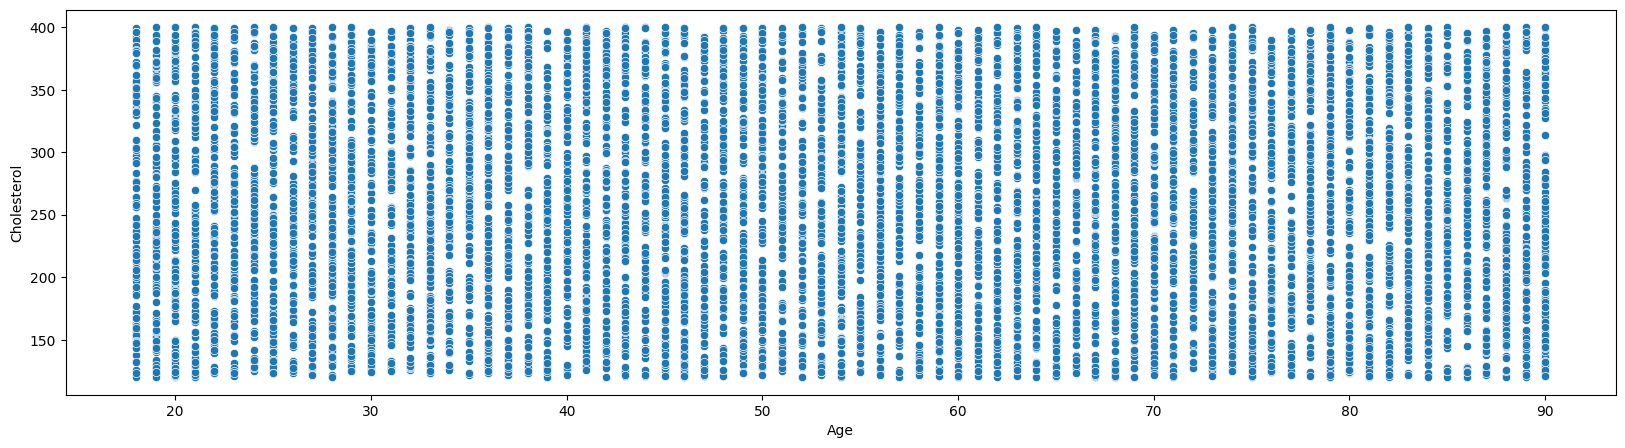

In [19]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Age",y="Cholesterol",data=heart_df)
plt.show()

Encoding Categorical Variables

Sex


Male   -->  1
Female  -->  0

Diet


Healthy  -->     1
Average   -->    0
Unhealthy -->    2


In [20]:
le = LabelEncoder()

# Encode categorical variables
heart_df['Sex']=le.fit_transform(heart_df['Sex'])

heart_df['Diet']=le.fit_transform(heart_df['Diet'])

### Preparing Data for Modeling

In [21]:
# Split the data into features and target variable
X = heart_df.drop(['Heart Attack Risk','Country','Continent','Hemisphere','Patient ID'], axis=1)
y = heart_df["Heart Attack Risk"]

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler=StandardScaler()

# Scale the features

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Training and Evaluating Logistic Regression Model

In [24]:
# Train and evaluate Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y1_pred = lg_model.predict(X_test)
accuracy_of_logistic_reg = accuracy_score(y_test, y1_pred)
classification_report_of_logistic_reg = classification_report(y_test, y1_pred)
print(f"Logistic Regression Accuracy: , {accuracy_of_logistic_reg*100.:2f}%")
print("Logistic Regression Classification Report:\n", classification_report_of_logistic_reg)

Logistic Regression Accuracy: , 64.175699%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.p

### Saving the Model

In [25]:
# Save the model
import pickle
model_filename = 'O:/virtual_intern/CodeClause-Data Science/Heart Disease Risk Assessment/trained_heart_model.sav'
pickle.dump(lg_model, open(model_filename, 'wb'))
scaler_filename = 'O:/virtual_intern/CodeClause-Data Science/Heart Disease Risk Assessment/scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))

## Deployment as a Web Application
##### The trained model was deployed using a Streamlit web application. The application is created in the ***Heart_Disease_Risk_Predict_Web_App.py*** script.

##### That completes the heart disease risk assessment project, from data preprocessing and EDA to model training and deployment as a web application.